# CAPSTONE 1 - CAR SHARING INVESTMENT TOOL DEV-NT

### Describe your dataset

    Data was received from the biggest car sharing platform in US (Top in Google search) - **Turo.com**. 
    It was scrapped from a web site and contains: all listed vehicles including parameters and exact location plus performance (how many days it was booked or blocked by an owner). 
    The data is signigicantly important for potential car owners who would like to share their car through the platform (either personal either invest money and use the cars exclusively for car sharing) 
    We consider only vehicles that has a status "Active" on the website.
    
### Results (main conclusions)
    1. There are **370695** listing at this moment. The distribution spreaded all over the world in **99 countries** [out.46] while the most listings are located in the USA and Canada [out.43] and the most popular brands as **Toyota** and **BMW**[out.14]. The owners has from 1-2 cars an average while the most has 263 car [out.38]. 
    2. The 'Price per day' in both countries for main distribution of listings is below $200 per day for car and US pricing is slightly lower than in CA.
    3. Top 10 most expensive vehicles/day are here [out.4] with the most expensive car *Ferrari	488 Pista*	$4,990/day
    4. Top 10 owners with the most amount of  active listings is in the chart [Out.14]. The car that made the most money is the Mercedes-Benz CLS-Class [out.47]. Last month the car brougth to his owner  **10,978 USD**
   
 
### Propose for further research

    Based on the historical data of occupancy rates learn how much can be the **potential income from a certain type of car based on a zip code using predictive models
   See the full report below: 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn
import seaborn as sns
df = pd.read_csv ('Turo crawled 09.2019.csv')
dfa = df[df['Status'] =="Active"]

/Users/valeriya/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,25,36,40,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,Car ID,Year,Number of seats,Number of doors,GPS,Convertible,Booking Instantly,Latitude,Longitude,Owner ID,...,Another Occupancy May,Another Occupancy Jun,Another Occupancy Jul,Another Occupancy Aug,Another Occupancy Sep,Another Occupancy Oct,Another Occupancy Nov,Another Occupancy Dec,Unnamed: 71,Unnamed: 72
count,370695.000000,370695.000000,243318.000000,260859.000000,146191.0,25530.0,370695.000000,370695.000000,370695.000000,3.706950e+05,...,1450.000000,1521.000000,1534.000000,1417.000000,1258.000000,20457.000000,11469.000000,10220.000000,0.0,0.0
mean,378659.098013,2012.869181,4.959033,3.709717,1.0,1.0,0.066926,36.469000,-94.338558,4.105173e+06,...,13.689655,12.838264,14.139505,14.266055,13.723370,14.753923,17.729968,18.690020,NaN,NaN
std,199364.969780,5.023112,1.087559,0.801218,0.0,0.0,0.249894,7.569675,31.425465,3.468030e+06,...,11.382379,10.756216,11.276115,11.379828,10.998797,11.409939,11.675537,11.937347,NaN,NaN
min,1.000000,1900.000000,0.000000,0.000000,1.0,1.0,0.000000,-45.020831,-176.632486,3.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,202746.000000,2011.000000,5.000000,4.000000,1.0,1.0,0.000000,33.130932,-118.246479,9.620915e+05,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,7.000000,NaN,NaN
50%,408834.000000,2014.000000,5.000000,4.000000,1.0,1.0,0.000000,36.064309,-93.877819,3.137975e+06,...,9.000000,9.000000,10.000000,11.000000,9.000000,10.000000,18.000000,19.000000,NaN,NaN
75%,552149.500000,2016.000000,5.000000,4.000000,1.0,1.0,0.000000,40.904095,-80.101279,6.966188e+06,...,26.000000,22.000000,27.000000,29.000000,28.000000,31.000000,30.000000,31.000000,NaN,NaN
max,683219.000000,2020.000000,15.000000,6.000000,1.0,1.0,1.000000,71.296937,177.468619,1.146174e+07,...,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000,NaN,NaN


Our data set  has 370695 listings. Let's see how the listing located all over the world:

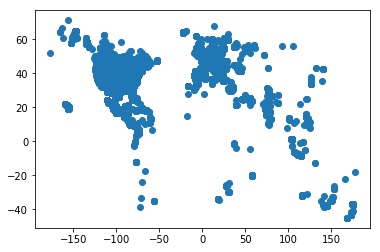

In [46]:
#mapping our location distribution
import matplotlib.pyplot as plt
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

Lisitng are spreaded all over the world with the most saturated area in South America

65.0

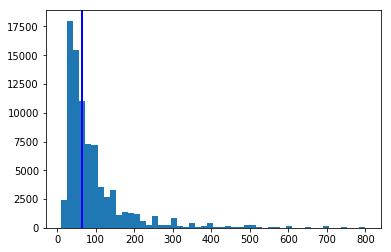

In [8]:
#Here is the distribution of the prices through the listings. 
#We limited it to the range 10-800$ to avoid noise among data that aren't significant 
plt.hist(dfa['Price per day'], bins=50, range=(10,800))
dfv = dfa [['Make', 'Model','Price per day', 'Country']]
plt.axvline(np.median(dfa['Price per day']), color='b', linestyle='solid', linewidth=2)
np.median(dfa['Price per day'])

The median price per day is 65$ day while the most listings has price range fro, 30$-220$

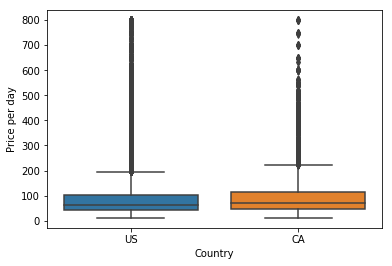

In [43]:
df1 = dfrange[dfrange['Country'].isin(['US','CA'])]
sns.boxplot(y='Price per day', x='Country', 
                 data=df1)

In [ ]:
The Price per day distribution within two countries is 

In [41]:
#Let's see how the most expensive cars are looking
dfrange = dfv[(dfv['Price per day']>10) & (dfv['Price per day']<800)]
dfv.nlargest(10, ['Price per day'])

,Make,Model,Price per day,Country
256322,Ferrari,488 GTB,3600.0,AT
198216,Lamborghini,Huracán Performante,3500.0,ES
200644,Lamborghini,Huracán Performante,3500.0,ES
200989,Lamborghini,Huracán Performante,3500.0,ES
201113,Lamborghini,Huracán Performante,3500.0,ES
322459,LAMBORGHINI,Urus,3400.0,IT
307846,Rolls-Royce,Ghost,3280.0,US
205169,ROLLS ROYCE,Dawn,3100.0,FR
222993,ROLLS ROYCE,Dawn,3100.0,FR
258418,ROLLS ROYCE,Dawn,3100.0,FR


In [17]:
# how many countries registered
cn = df.groupby('Country')
cn
len (cn)

99

In [19]:
df.groupby(df['Country'], sort = True)

In [43]:
#TOP 10 countrues by quantity of car refistered
df.groupby('Country').size().sort_values(ascending=False).head(10)

Country
US    327384
CA     25770
GB      7186
DE      4049
FR       714
ES       609
MX       602
IT       334
AU       312
GR       284
dtype: int64

In [38]:
topown = dfa.groupby(dfa[dfa['Status'] =="Active"]['Owner ID']).size().sort_values(ascending=False)
topown.describe()

count    55961.000000
mean         1.476278
std          2.778970
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        263.000000
dtype: float64

The maximum car amount is 263 per registered owner while most of the owners has from 1-2 cars listed on the platform

In [50]:
#TOP 10 car brands  within US countrues by quantity of car refistered
df.groupby(df[df['Status'] =="Active"] ['Make']).size().sort_values(ascending=False).head(10)

Make
Toyota           8530
BMW              6862
Ford             6015
Mercedes-Benz    5757
Chevrolet        5114
Nissan           4832
Honda            4337
Jeep             3460
Tesla            3091
Hyundai          3059
dtype: int64

In [47]:
#TOP 10 cars by earnings/month in September 2019
dfa['Earning'] = dfa['Occupancy Sep'] * dfa['Price per day']
dfv = dfa [['Make', 'Model','Price per day', 'Country', 'Earning']]
dfv.nlargest(10, ['Earning'])


/Users/valeriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Make,Model,Price per day,Country,Earning
63826,Mercedes-Benz,CLS-Class,499.0,US,10978.0
52013,BMW,6 Series,399.0,US,7581.0
51344,Porsche,Panamera,199.0,US,5970.0
65773,Toyota,4Runner,249.0,US,4980.0
65106,Tesla,Model S,280.0,US,4760.0
56032,BMW,7 Series,750.0,US,4500.0
51765,Mercedes-Benz,C-Class,159.0,US,3975.0
60314,GMC,Yukon XL,220.0,US,3960.0
66431,Mercedes-Benz,C-Class,159.0,US,3816.0
56896,Volkswagen,Touareg,189.0,US,3780.0
